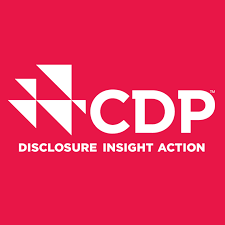

**PROBLEM STATEMENT**

Develop a methodology for calculating key performance indicators (KPIs) that relate to the environmental and social issues that are discussed in the CDP survey data. Leverage external data sources and thoroughly discuss the intersection between environmental issues and social issues. Mine information to create automated insight generation demonstrating whether city and corporate ambitions take these factors into account.

* How do you help cities adapt to a rapidly changing climate amidst a global pandemic, but do it in a way that is socially equitable?

* What are the projects that can be invested in that will help pull cities out of a recession, mitigate climate issues, but not perpetuate racial/social inequities?

* What are the practical and actionable points where city and corporate ambition join, i.e. where do cities have problems that corporations affected by those problems could solve, and vice versa?

* How can we measure the intersection between environmental risks and social equity, as a contributor to resiliency?

**Note:**

**While creating this study, examples from many previous studies on this problem were taken. In this respect, thanks to the scientists who shared and contributed to all kinds of development.**

**Importing Libraries**

In [ ]:
# standard libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json
import cufflinks as cf
import plotly.figure_factory as ff
import emoji
from pprint import pprint
import collections
import string
import time
from time import time
import math


# plotting libs
import seaborn as sns

# geospatial libs
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
import geopandas as gpd
import folium
import plotly.graph_objects as go
import plotly_express as px
from plotly.offline import (download_plotlyjs, 
                            init_notebook_mode, 
                            plot, 
                            iplot)

from tabulate import tabulate
import ipywidgets as widgets

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import gensim

import heapq
from textblob import TextBlob
import spacy
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
from IPython.display import display
import base64

from collections import Counter


import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger("lda").setLevel(logging.WARNING)

# set in line plotly 
from plotly.offline import init_notebook_mode;
init_notebook_mode(connected=True)

cf.go_offline()

print(os.getcwd())

![image](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1314380%2F6f0f4d334e5b094bfcf002c4d2e931f6%2FCDP_dataset.png?generation=1603468553539656&alt=media)

We want to merge all the files and then get insight from them. So, we gonna start with cities datasets

**Dictionary for labelling df names**

### Cities

* Cities : c
* Disclosing : d
* Questionnaires : q
* Responses : r

### Corporations

* Corporations : cr
* Disclosing : d
* Questionnaires : q
* Responses : r
* Climate Change : cc
* Water Security : ws


**Note : We will look to the ''*Supplementary Data*'' after merge and subset of the above folder datasets.**

# Import Data

**Cities**

In [ ]:
# import cities data
    # For Cities Disclosing
cd_2018 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Disclosing/2018_Cities_Disclosing_to_CDP.csv')
cd_2019 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Disclosing/2019_Cities_Disclosing_to_CDP.csv')
cd_2020 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Disclosing/2020_Cities_Disclosing_to_CDP.csv')
    # For Cities Responses
cr_2018 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/2018_Full_Cities_Dataset.csv')
cr_2019 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/2019_Full_Cities_Dataset.csv')
cr_2020 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/2020_Full_Cities_Dataset.csv')

**Corporations**

In [ ]:
# import corporations data
    # For Corporations Disclosing
        # For Climate Change
crd_cc_2018 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Disclosing/Climate Change/2018_Corporates_Disclosing_to_CDP_Climate_Change.csv')
crd_cc_2019 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Disclosing/Climate Change/2019_Corporates_Disclosing_to_CDP_Climate_Change.csv')
crd_cc_2020 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Disclosing/Climate Change/2020_Corporates_Disclosing_to_CDP_Climate_Change.csv')
        # For Water Security 
crd_ws_2018 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Disclosing/Water Security/2018_Corporates_Disclosing_to_CDP_Water_Security.csv')
crd_ws_2019 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Disclosing/Water Security/2019_Corporates_Disclosing_to_CDP_Water_Security.csv')
crd_ws_2020 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Disclosing/Water Security/2020_Corporates_Disclosing_to_CDP_Water_Security.csv')
    # For Corporations Responses
        # For Climate Change
crr_cc_2018 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Climate Change/2018_Full_Climate_Change_Dataset.csv')
crr_cc_2019 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Climate Change/2019_Full_Climate_Change_Dataset.csv')
crr_cc_2020 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Climate Change/2020_Full_Climate_Change_Dataset.csv')
        # For Water Security 
crr_ws_2018 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Water Security/2018_Full_Water_Security_Dataset.csv')
crr_ws_2019 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Water Security/2019_Full_Water_Security_Dataset.csv')
crr_ws_2020 = pd.read_csv('../input/cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Water Security/2020_Full_Water_Security_Dataset.csv')

**Suplementary Data**

In [ ]:
# CDC 500 Cities Census Tract Data
cdc_cities_census_track_data = pd.read_csv("../input/cdp-unlocking-climate-solutions/Supplementary Data/CDC 500 Cities Census Tract Data/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv")
# CDC Social Vulnerability Index 2018
cdc_social_vulnerability_index_2018_uscounty = pd.read_csv("../input/cdp-unlocking-climate-solutions/Supplementary Data/CDC Social Vulnerability Index 2018/SVI2018_US_COUNTY.csv")
# external data - import CDC social vulnerability index data - census tract level
cdc_social_vulnerability_index_2018_us = pd.read_csv("../input/cdp-unlocking-climate-solutions/Supplementary Data/CDC Social Vulnerability Index 2018/SVI2018_US.csv")
# cities metadata - lat,lon locations for US cities
simple_maps_us_cities_data = pd.read_csv("../input/cdp-unlocking-climate-solutions/Supplementary Data/Simple Maps US Cities Data/uscities.csv")
# cities metadata - CDP metadata on organisation HQ cities
locations_of_corporations = pd.read_csv("../input/cdp-unlocking-climate-solutions/Supplementary Data/Locations of Corporations/NA_HQ_public_data.csv")

Referance image for merge process

In [ ]:
import os
from IPython.display import Image
Image(filename="../input/cdp-image/inbox_1314380_6f0f4d334e5b094bfcf002c4d2e931f6_CDP_dataset.png", width= 1135, height=1615)

# **Merge Process**

In [ ]:
# For Cities 
    # For Cities Disclosing
dataset = [cd_2018, cd_2019, cd_2020]
cd = pd.concat(dataset)

# For Cities
    # For Cities Responses
dataset1 = [cr_2018, cr_2019, cr_2020]
cr = pd.concat(dataset1)

# For Corporations
    # For Corporations Disclosing
        # For Climate Change
dataset2 = [crd_cc_2018, crd_cc_2019, crd_cc_2020]
crd_cc = pd.concat(dataset2)

# For Corporations
    # For Corporations Disclosing
        # For Water Security
dataset3 = [crd_ws_2018, crd_ws_2019, crd_ws_2020]
crd_ws = pd.concat(dataset3)

Adding topic column for identify of datasets before combine them

In [ ]:
crd_cc['topic'] = 'Climate Change'
crd_ws['topic'] = 'Water Security'

In [ ]:
# For Corporations
    # For Corporations Disclosing
dataset7 = [crd_cc, crd_ws]
crd = pd.concat(dataset7)

# For Corporations
    # For Corporations Responses
        # For Climate Change
dataset4 = [crr_cc_2018, crr_cc_2019, crr_cc_2020]
crr_cc = pd.concat(dataset4)

# For Corporations
    # For Corporations Responses
        # For Water Security
dataset5 = [crr_ws_2018, crr_ws_2019, crr_ws_2020]
crr_ws = pd.concat(dataset5)

Adding "**topic**" column for identify of datasets before combine them

In [ ]:
crr_cc['topic'] = 'Climate Change'
crr_ws['topic'] = 'Water Security'

In [ ]:
# For Corporations
    # For Corporations Disclosing
dataset6 = [crr_cc, crr_ws]
crr = pd.concat(dataset6)

**First Look**
---

Cities:

* cd --> Cities Disclosing
* cr --> Cities Responses

Corporations:
* crd --> Corprations Disclosing
* crr --> Corporations Responses

**For Corporations**

* For Responses

In [ ]:
crr.info()

* For Disclosing

In [ ]:
crd.info()

For Cities Disclosing

In [ ]:
cd.info()

For Cities Responses

In [ ]:
cr.info()

# **Data Preparation**

For "**cr**" data

* Change **Organization** column name to **City** 
* Fill **NAN** values with **'No Response'** on the **Response Answer** column
* Fill **NAN** values with **'No Section'** on the **Parent Section** column
* Fill **NAN** values with **'Unknown'** on the **Column Name** column
* Fill **NAN** values with **'Unknown'** on the **Row Name** column
* Fill **NAN** valus with **'No Comment'** on the **Comments** column
* Drop **'File Name'** column (%99 Null values)

Note: Check Related Data Dictionary 

**(../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/Full_Cities_Response_Data_Dictionary.csv)**

In [ ]:
cr = cr.rename(columns={'Organization': 'City'})
cr['Response Answer'] = cr['Response Answer'].fillna('No Response')
cr['Parent Section'] = cr['Parent Section'].fillna('No Section')
cr['Column Name'] = cr['Column Name'].fillna('Unknown')
cr['Row Name'] = cr['Row Name'].fillna('Unknown')
cr['Comments'] = cr['Comments'].fillna('No Comment')
cr = cr.drop(['File Name'], axis=1)

In [ ]:
cr.isnull().values.any()

* For **"cd"** dataset

* Fill **NAN** values with **'Unknown'** on the **City** column
* Fill **NAN** values with **mean** values on the **Population** column
* Fill **NAN** values with location values from [country_lat_long](https://www.kaggle.com/alexkaechele/country-geo) on he **City Location** column

Note: Check Related Data Dictionary 

**(../input/cdp-unlocking-climate-solutions/Cities/Cities Disclosing/Cities_Disclosing_to_CDP_Data_Dictionary.csv)**

In [ ]:
ncountry = cd[cd['City Location'].isnull()]
ncountry['Country'].unique()

In [ ]:
ncountry['City Location'] = np.where ((ncountry["Country"] == "Turkey"),'POINT (38.963745 35.243322)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Sweden"),'POINT (60.128161 18.643501)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Peru"),'POINT (-9.189967 -75.015152)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Brazil"),'POINT (-14.235004 -51.92528)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Argentina"),'POINT (-38.4161 -63.6167)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Germany"),'POINT (51.165691 10.451526)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Philippines"),'POINT (12.879721 121.774017)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Chile"),'POINT (-35.675147 -71.542969)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Thailand"),'POINT (15.870032 100.992541)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "New Zealand"),'POINT (-40.900557 174.885971)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Guatemala"),'POINT (15.783471 -90.230759)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Indonesia"),'POINT (-0.789275 113.921327)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Colombia"),'POINT (4.570868 -74.297333)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "United Kingdom of Great Britain and Northern Ireland"),'POINT (55.378051 -3.435973)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Portugal"),'POINT (39.399872 -8.224454)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Mexico"),'POINT (23.634501 -102.552784)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "United States of America"),'POINT (37.09024 -95.712891)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Italy"),'POINT (41.87194 12.56738)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "India"),'POINT (20.593684 78.96288)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Australia"),'POINT (-25.274398 133.775136)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Lebanon"),'POINT (33.854721 35.862285)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Canada"),'POINT (56.130366 -106.346771)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Taiwan, Greater China"),'POINT (23.69781 120.960515)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Liberia"),'POINT (6.428055 -9.429499)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "State of Palestine"),'POINT (31.952162 35.233154)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "South Africa"),'POINT (-30.559482 22.937506)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "China"),'POINT (35.86166 104.195397)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Viet Nam"),'POINT (14.058324 108.277199)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Lithuania"),'POINT (55.169438 23.881275)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Venezuela (Bolivarian Republic of)"),'POINT (6.42375 -66.58973)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Spain"),'POINT (40.463667 -3.74922)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Malaysia"),'POINT (4.210484 101.975766)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Costa Rica"),'POINT (9.748917 -83.753428)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Romania"),'POINT (45.943161 24.96676)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Uganda"),'POINT (1.373333 32.290275)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Burkina Faso"),'POINT (12.238333 -1.561593)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Republic of Korea"),'POINT (40.339852 127.510093)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Norway"),'POINT (60.472024 8.468946)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "France"),'POINT (46.227638 2.213749)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Republic of Moldova"),'POINT (47.411631 28.369885)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Netherlands"),'POINT (52.132633 5.291266)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Finland"),'POINT (61.92411 25.748151)' , ncountry['City Location'])
ncountry['City Location'] = np.where ((ncountry["Country"] == "Honduras"),'POINT (15.199999 -86.241905)' , ncountry['City Location'])


In [ ]:
cd = cd[cd['City Location'].notna()]
datasett = [cd, ncountry]
cd = pd.concat(datasett)

In [ ]:
cd['City'] = cd['City'].fillna('Unknown')
cd['Population'].fillna(cd['Population'].mean(), inplace=True)

In [ ]:
cd.isnull().values.any()

For **"crr"** dataset

**Note:** The dictionary of climate change datasets for corporations responses **"Full_Corporations_Response_Data_Dictionary copy.csv"** says: 'Use this unique identifier to match question responses across multiple years. For E.g. If question C0.1 has changed it’s question number label to question C0.2 from 2019 to 2020 - use the data_point_id_id to find the same response at column level from 2019 to 2020, mapping responses to the same question across multiple years'.. In the 2019 year dataset there are some **"NAN"** values for **"data_point_id"** column. We can't match these questions for other years. So I'm gonna ignore these **"NAN"** values and fill them a unique number to identify them as **'1000000000'**

* Drop the **"accounting_period_to"** column (%98 null values)
* Fill **"NAN"** values with **3** (3, when non-response table questions with no columns) on the **column_number** column
* Fill **"NAN"** values with **"Non-Response Table"** on the **row_name** column (non-response table questions)
* Fill **"NAN"** values with **1000000000** on the **data_point_id** column
* Fill **"NAN"** values with **"No Response"** on the **response_values** column
* Fill **"NAN"** values with **"No Comment"** on the **comments** column

Note: Check Related Data Dictionary 

**(../input/cdp-unlocking-climate-solutions/Corporations/Corporations Responses/Water Security/Full_Corporations_Response_Data_Dictionary.csv)**

In [ ]:
# Delete the "accounting_period_to" column from the "crr" dataframe
crr = crr.drop("accounting_period_to", axis=1)

# Fill "NAN" values with 3 on the column_number column
crr['column_number'] = crr['column_number'].fillna(3)

# Fill "NAN" values with "Non-Response Table" on the row_name column
crr['row_name'] = crr['row_name'].fillna('Non-Response Table')

# Fill "NAN" values with 1000000000 on the data_point_id column
crr['data_point_id'] = crr['data_point_id'].fillna(1000000000)

#Fill **"NAN"** values with **"No Response"** on the **response_values** column
crr['response_value'] = crr['response_value'].fillna('No Response')

# Fill **"NAN"** values with **"No Comment"** on the **comments** column
crr['comments'] = crr['comments'].fillna('No Comment')

In [ ]:
# Clean â€™ like symbols
crr['question_unique_reference'] = \
        crr['question_unique_reference']\
        .replace(regex=r'â€™', value="'")

In [ ]:
crr.isnull().values.any()

For **"crd"** dataset

* Drop the **region** column (% 98 null values). We could fill **NANs** with the **Unknown** but this process not gonna bring us any information
* Fill **"NAN"** values with **"Unknown"** on the **samples** column
* Fill **"NAN"** values with **"Unknown"** on the **minimum_tier** column
* Fill **"NAN"** values with **"Unknown"** on the **primary_ticker** column
* Fill **"NAN"** values with **"Unknown"** on the **tickers** column
* Fill **"NAN"** values with **"Unknown"** on the **primary_activity** column
* Fill **"NAN"** values with **"Unknown"** on the **primary_sector** column
* Fill **"NAN"** values with **"Other"** on the **primary_industry** column
* Fill **"NAN"** values with **"Not Available"** on the **primary_questionnaire_sector** column

Note: Check Related Data Dictionary 

**(../input/cdp-unlocking-climate-solutions/Corporations/Corporations Disclosing/Climate Change/Corporations_Disclosing_to_CDP_Data_Dictionary.csv)**

In [ ]:
# Drop "region" column
crd = crd.drop("region", axis=1)

# Fill "NAN" values with "Unknown" on the samples columnn
crd['samples'] = crd['samples'].fillna('Unknown')

# Fill "NAN" values with "Unknown" on the minimum_tier column
crd['minimum_tier'] = crd['minimum_tier'].fillna('Unknown')

# Fill "NAN" values with "Unknown" on the primary_ticker column
crd['primary_ticker'] = crd['primary_ticker'].fillna('Unknown')

# Fill "NAN" values with "Unknown" on the tickers column
crd['tickers'] = crd['tickers'].fillna('Unknown')

# Fill "NAN" values with "Unknown" on the primary_activity column
crd['primary_activity'] = crd['primary_activity'].fillna('Unknown')

# Fill "NAN" values with "Unknown" on the primary_sector column
crd['primary_sector'] = crd['primary_sector'].fillna('Unknown')

# Fill "NAN" values with "Other" on the primary_sector column
crd['primary_industry'] = crd['primary_industry'].fillna('Other')

# Fill "NAN" values with "Not Available" on the primary_questionnaire_sector column
crd['primary_questionnaire_sector'] = crd['primary_questionnaire_sector'].fillna('Not Available')

In [ ]:
crd.isnull().values.any()

Deleting unneccessary datasets

In [ ]:
del crr_ws
del crr_cc
del crd_ws
del crd_cc
del cr_2018
del cr_2019
del cr_2020
del cd_2018
del cd_2019
del cd_2020
del crd_cc_2018
del crd_cc_2019
del crd_cc_2020
del crd_ws_2018
del crd_ws_2019
del crd_ws_2020
del crr_cc_2018
del crr_cc_2019
del crr_cc_2020
del crr_ws_2018
del crr_ws_2019
del crr_ws_2020

------------------------------------------------------------------------------------------

# **Analysis**

**Questions**

[example notebook](https://www.kaggle.com/ellada/breaking-down-the-problem-reshaping-data-eda)

Examination of provided (as pdf) ) questionnaire reveals very hiearchial structure of dataset. Main questions are grouped into modules, and there are many subdivisions to main questions, some are with multiple choices for organizations to respond to. Would it be helpful (for analysis) to subset data say by a Module and pre-process each module/df in sequence?

In [ ]:
data_f = crr['module_name'].value_counts().\
                                                  to_dict()

#import plotly.express as px
fig = px.funnel(x = list(data_f.values()),
                y = list(data_f.keys()))

fig.update_layout(title_text='Number of rows per module (k=1000)')
fig.show()

**Cities Responses** **(cr dataset)**

* Question 0.1(**Introduction**)

* Question 1.0(**Governance and Data Management- Vulnerability**)

* Question 2.0(**Climate Hazards**)

* Question 2.2(**Climate Hazards**)

* Question 3(**Adaptation**)  

* Question 4.0(**City-wide Emission**)

* Question 6.1(**Opportunuties**)

* Question 8.0(**Energy**)

* Question 10.11(**Transport**)

* Question 12(**Food**)

* Question 13(**Waste**)

* Question 14.3(**Water Security**)

* Question 14.0(**Water Security**)

By analyzing as many questions as we can, we will try to find the KPIs that give us the best results.

**Climate Change**

In [ ]:
climate = pd.merge(crd, crr, 'inner', on=['survey_year', 'account_number', 'organization', 'response_received_date', 'topic'])
climate = climate[climate['topic'] == 'Climate Change']

In [ ]:
water = pd.merge(crd, crr, 'inner', on=['survey_year', 'account_number', 'organization', 'response_received_date', 'topic'])
water = water[water['topic'] == 'Water Security']

In [ ]:
def get_climate(q, by='row_number', year=2020, cols=['organization']):
    val = climate[climate['question_number']==q]['question_unique_reference']
    sh = val.shape[0]
    if sh > 0:
        print(q, val.iloc[0], f'({sh})')
    return climate[(climate['survey_year'] == year) & (climate['question_number']==q)][cols + [by, 'column_name', 'response_value']].dropna(subset=['response_value'])

In [ ]:
def get_water(q, by='row_number', year=2020, cols=['organization']):
    val = water[water['question_number']==q]['question_unique_reference']
    val2 = water[(water['survey_year'] == year) & (water['question_number']==q)][cols + [by, 'column_name', 'response_value']].dropna(subset=['response_value'])
    sh = val2.shape[0]
    if sh > 0:
        print(q, val.iloc[0], f'({sh})')
    return val2

Below, we have picked a set of key questions from these sections in the questionnaire. We believe these might be useful in building the KPIs for corporations with respect to their influence on climate change and the potential risk certain climate hazards pose to their operations.

In [ ]:
qs_cc = ['C2.2', 'C2.2a', 'C2.3a', 'C2.4a', 'C4.1a', 'C4.1b', 'C4.2b',
         'C4.3a', 'C4.3b', 'C4.5a', 'C6.1', 'C6.3', 'C6.5',  'C6.10', 
         'C7.1a', 'C7.2', 'C7.3a', 'C7.3b', 'C7.3c', 'C7.5', 'C7.6a', 
         'C7.6c','C7.6b', 'C8.1', 'C8.2', 'C8.2a', 'C8.2b', 'C8.2c',
         'C8.2d', 'C8.2e', 'C12.1a', 'C12.1b', 'C12.3a']

qs_cc =sorted(climate[climate['survey_year']==2019]['question_number'].unique())

for q in qs_cc:
    get_climate(q, year=2019)

In [ ]:
cc2_2a = get_climate('C2.2a', by='row_name')
cc2_2a.row_name.value_counts().plot(kind='bar', title='Risk areas considered by corporated (2020)');
# cc2_2a.pivot(index=['organization', 'row_name'], columns='column_name')

In [ ]:
cc2_3a = get_climate('C2.3a')
piv2_3a = cc2_3a.pivot(index=['organization', 'row_number'], columns='column_name')['response_value']
piv2_3a[['C2.3a_C3Risk type & Primary climate-related risk driver', 'C2.3a_C9Magnitude of impact']] \
.groupby('C2.3a_C3Risk type & Primary climate-related risk driver')['C2.3a_C9Magnitude of impact'] \
.value_counts().sort_values(ascending=False)[:60].unstack() \
.plot(kind='barh', stacked=True, title='Types of risks with their magnitude of impact on businesses (2020)');

In [ ]:
piv2_3a[['C2.3a_C4Primary potential financial impact', 'C2.3a_C9Magnitude of impact']] \
.groupby('C2.3a_C4Primary potential financial impact')['C2.3a_C9Magnitude of impact'] \
.value_counts().sort_values(ascending=False)[:48].unstack() \
.plot(kind='barh', stacked=True, title='Kind of financial impacts on business and their magnitudes (2020)');

In [ ]:
cc2_4a = get_climate('C2.4a')
ccpiv2_4a = cc2_4a.pivot(index=['organization', 'row_number'], columns='column_name')['response_value']

ccpiv2_4a[['C2.4a_C3Opportunity type','C2.4a_C4Primary climate-related opportunity driver', 'C2.4a_C7Time horizon']] \
.groupby(['C2.4a_C3Opportunity type', 'C2.4a_C4Primary climate-related opportunity driver'])['C2.4a_C7Time horizon'].value_counts() \
.sort_values(ascending=False)[:60].unstack().plot(kind='barh', figsize=(10, 8), stacked=True, title='Opportunity type and drivers, and time horizons for their potential impacts on business (2020)');

In [ ]:
ccpiv2_4a[['C2.4a_C5Primary potential financial impact', 'C2.4a_C9Magnitude of impact']] \
.groupby('C2.4a_C5Primary potential financial impact')['C2.4a_C9Magnitude of impact'] \
.value_counts().sort_values(ascending=False)[:33].unstack() \
.plot(kind='barh', stacked=True, title='Financial impacts of identified opportunities and the magnitudes (2020)');

In [ ]:
cc4_1a = get_climate('C4.1a')
cc4_1a = cc4_1a[cc4_1a['response_value']!= 'No Response']
cc4_1a.head()

In [ ]:
ccpiv4_1a = cc4_1a.pivot(index=['organization', 'row_number'], columns='column_name')['response_value'] \
[['C4.1a_C5Base year', 'C4.1a_C6Covered emissions in base year (metric tons CO2e)', 'C4.1a_C8Target year', 'C4.1a_C9Targeted reduction from base year (%)', 'C4.1a_C12% of target achieved [auto-calculated]']]

for col in ccpiv4_1a.columns:
    ccpiv4_1a[col] = ccpiv4_1a[col].astype('float64', copy=False )

ccpiv4_1a['Target'] = ccpiv4_1a['C4.1a_C6Covered emissions in base year (metric tons CO2e)'] - (ccpiv4_1a['C4.1a_C6Covered emissions in base year (metric tons CO2e)'] * ccpiv4_1a['C4.1a_C9Targeted reduction from base year (%)']/100)
ccpiv4_1a['Reporting'] = ccpiv4_1a['C4.1a_C6Covered emissions in base year (metric tons CO2e)'] - ((ccpiv4_1a['C4.1a_C12% of target achieved [auto-calculated]']/100) * (ccpiv4_1a['C4.1a_C6Covered emissions in base year (metric tons CO2e)'] - ccpiv4_1a['Target']))
ccpiv4_1a.drop(['C4.1a_C9Targeted reduction from base year (%)', 'C4.1a_C12% of target achieved [auto-calculated]'], axis=1, inplace=True)

In [ ]:
cc6_1 = get_climate('C6.1', by='row_name')
cc6_1 = cc6_1[cc6_1['response_value'] != 'No Response']
ccpiv6_1 = cc6_1.pivot(index=['organization', 'row_name'], columns='column_name')['response_value']
ccpiv6_1['C6.1_C1Gross global Scope 1 emissions (metric tons CO2e)'] = ccpiv6_1['C6.1_C1Gross global Scope 1 emissions (metric tons CO2e)'].astype('float32')
ccpiv6_1['C6.1_C1Gross global Scope 1 emissions (metric tons CO2e)'].sort_values(ascending=False)[:120].unstack() \
.plot(kind='barh', figsize=(8, 14), logx=True, width=0.9, title='Organization yearly Scope 1 emissions in metric tonnes (reported 2020)');

In [ ]:
cc6_3 = get_climate("C6.3", by='row_name')
cc6_3 = cc6_3[cc6_3['response_value'] != 'No Response']
ccpiv6_3 = cc6_3.pivot(index=['organization', 'row_name'], columns='column_name')['response_value']
ccpiv6_3['C6.3_C1Scope 2, location-based'] = ccpiv6_3['C6.3_C1Scope 2, location-based'].astype('float32')
ccpiv6_3['C6.3_C2Scope 2, market-based (if applicable)'] = ccpiv6_3['C6.3_C2Scope 2, market-based (if applicable)'].astype('float32')
ccpiv6_3['sum'] = ccpiv6_3['C6.3_C1Scope 2, location-based'] + ccpiv6_3['C6.3_C2Scope 2, market-based (if applicable)']

ccpiv6_3.sort_values(by='sum', ascending=False)[:80].drop('sum', axis=1) \
.plot(kind='barh', figsize=(10, 14), logx=True, width=0.9, title='Organization location and market based Scope 2 emissions in metric tonnes (reported 2020)');

In [ ]:
cc6_5 = get_climate("C6.5", by='row_name')
cc6_5 = cc6_5[cc6_5['response_value'] != 'No Response']
ccpiv6_5 = cc6_5.pivot(index=['organization', 'row_name'], columns='column_name')['response_value']['C6.5_C2Metric tonnes CO2e']
ccpiv6_5 = ccpiv6_5.astype('float32')

ccpiv6_5.groupby('row_name').sum().sort_values().plot(kind='bar', title='Global Scope 3 emissions by activity/source (2020)');

In [ ]:
ccpiv6_5 = ccpiv6_5.unstack()
ccpiv6_5['sum'] = ccpiv6_5.sum(axis=1)
ccpiv6_5.sort_values(by='sum', ascending=False)[:60].drop('sum', axis=1) \
.plot(kind='barh', figsize=(12, 12), width=0.91, stacked=True, cmap='tab20', title='Organization Scope 3 emissions by activity/source (2020)').legend(bbox_to_anchor=(1, 0.6));

In [ ]:
cc7_1a = get_climate('C7.1a')
cc7_1a = cc7_1a[cc7_1a['response_value'] != 'No Response']
ccpiv7_1a = cc7_1a.pivot(index=['organization', 'row_number'], columns='column_name')['response_value'].reset_index().drop(['row_number', 'C7.1a_C3GWP Reference'], axis=1)
ccpiv7_1a['C7.1a_C2Scope 1 emissions (metric tons of CO2e)'] = ccpiv7_1a['C7.1a_C2Scope 1 emissions (metric tons of CO2e)'].astype('float32')
ccpiv7_1a = ccpiv7_1a.pivot_table(index=['organization'], columns='C7.1a_C1Greenhouse gas', aggfunc=sum)['C7.1a_C2Scope 1 emissions (metric tons of CO2e)'] \
[['CO2', 'CO2: Refrigerants', 'CH4', 'N2O', 'HFCs', 'PFCs', 'SF6', 'NF3']]

ccpiv7_1a['sum'] = ccpiv7_1a.sum(axis=1)
ccpiv7_1a.sort_values('sum', ascending=False)[:60].drop('sum', axis=1) \
.plot(kind='barh', stacked=True, figsize=(10,10), title='Breakdown of Scope 1 emissions by Greenhouse Gas of top emitters (2020)');

In [ ]:
cc7_2 = get_climate('C7.2')
cc7_2 = cc7_2[cc7_2['response_value'] != 'No Response']
ccpiv7_2 = cc7_2.pivot(index=['organization', 'row_number'], columns='column_name')['response_value']

ccpiv7_2['C7.2_C2Scope 1 emissions (metric tons CO2e)'] = ccpiv7_2['C7.2_C2Scope 1 emissions (metric tons CO2e)'].astype('float32')
ccpiv7_2.groupby(['C7.2_C1Country/Region'])['C7.2_C2Scope 1 emissions (metric tons CO2e)'].sum().sort_values(ascending=False)[:30] \
.plot(kind='barh', figsize=(8,8), logx=True, title='Total Scope 1 emissions by country/region (2020)').legend(bbox_to_anchor=(0.2, 1));

In [ ]:
ccpiv7_2.groupby(['C7.2_C1Country/Region'])['C7.2_C2Scope 1 emissions (metric tons CO2e)'].mean() \
.sort_values(ascending=False)[:80].plot(kind='barh', figsize=(10,14), logx=True, title='Mean Scope 1 emissions by country/region (2020)');

In [ ]:
cc7_5 = get_climate('C7.5')
cc7_5 = cc7_5[cc7_5['response_value'] != 'No Response']
ccpiv7_5 = cc7_5.pivot(index=['organization', 'row_number'], columns='column_name')['response_value']
ccpiv7_5['C7.5_C2Scope 2, location-based (metric tons CO2e)'] = ccpiv7_5['C7.5_C2Scope 2, location-based (metric tons CO2e)'].astype('float32')
ccpiv7_5['C7.5_C3Scope 2, market-based (metric tons CO2e)'] = ccpiv7_5['C7.5_C3Scope 2, market-based (metric tons CO2e)'].astype('float32')
ccpiv7_5['total CO2e'] = ccpiv7_5['C7.5_C2Scope 2, location-based (metric tons CO2e)'] + ccpiv7_5['C7.5_C3Scope 2, market-based (metric tons CO2e)']
ccpiv7_5.groupby(['C7.5_C1Country/Region'])['total CO2e'].sum().sort_values(ascending=False)[:75] \
.plot(kind='barh', logx=True, figsize=(10,12), title='Total Scope 2 emissions by region (2020)');

In [ ]:
ccpiv7_5.groupby(['C7.5_C1Country/Region'])['total CO2e'].mean().sort_values(ascending=False)[:75] \
.plot(kind='barh', figsize=(10,12), logx=True, title='Mean Scope 2 emissions by region (2020)');

In [ ]:
get_climate('C8.1')['response_value'].value_counts() \
.plot(kind='barh', title='Organizational spend on energy (2020)', figsize=(10, 6));

In [ ]:
get_climate('C8.2', by='row_name').groupby('row_name')['response_value'].value_counts().unstack() \
.plot(kind='bar', title='Energy related activities undertaken by organizations (2020)', figsize=(10, 6));

In [ ]:
cc8_2a = get_climate('C8.2a', by='row_name')
cc8_2a = cc8_2a[cc8_2a['response_value'] != 'No Response']
cc8_2a.pivot(index=['organization', 'row_name'], columns='column_name')['response_value'] \
[['C8.2a_C2MWh from renewable sources', 'C8.2a_C3MWh from non-renewable sources']] \
.astype('float32').groupby(['row_name']).sum() \
.plot(kind='bar', figsize=(8, 6), title='Global energy consumption by organizations by source (2020)');

In [ ]:
get_climate('C8.2b', by='row_name').groupby('row_name')['response_value'].value_counts().unstack() \
.plot(kind='barh', title='Applications of fuel use by organization (2020)', figsize=(10, 6));

In [ ]:
cc8_2c = get_climate('C8.2c')
cc8_2c = cc8_2c[cc8_2c['response_value'] != 'No Response']
ccpiv8_2c = cc8_2c.pivot(index=['organization', 'row_number'], columns='column_name')['response_value']
ccpiv8_2c['C8.2c_C3Total fuel MWh consumed by the organization'] = ccpiv8_2c['C8.2c_C3Total fuel MWh consumed by the organization'].astype('float64')

ccpiv8_2c.groupby(['organization', 'C8.2c_C1Fuels (excluding feedstocks)'])['C8.2c_C3Total fuel MWh consumed by the organization'].sum() \
.sort_values(ascending=False)[:120].unstack() \
.plot(kind='barh', stacked=True, figsize=(10,14), cmap='tab20', title='Breakdown of fuels consumption in MWh by organizations (2020)');

In [ ]:
cc8_2d = get_climate('C8.2d', by='row_name')
cc8_2d = cc8_2d[cc8_2d['response_value'] != 'No Response']
ccpiv8_2d = cc8_2d.pivot(index=['organization', 'row_name'], columns='column_name')['response_value'].astype('float32') \
[['C8.2d_C1Total Gross generation (MWh)', 'C8.2d_C3Gross generation from renewable sources (MWh)']].groupby('row_name').sum()
ccpiv8_2d['Gross generation from non-renewable sources'] = ccpiv8_2d['C8.2d_C1Total Gross generation (MWh)'] - ccpiv8_2d['C8.2d_C3Gross generation from renewable sources (MWh)']

ccpiv8_2d.drop('C8.2d_C1Total Gross generation (MWh)', axis=1) \
.plot(kind='bar', title='Comparisions between generation of electricity, heat, steam, cooling from renewable and non-renewable sources (2020)', figsize=(10, 8)).legend(bbox_to_anchor=(1,0.1));

In [ ]:
cc12_1a = get_climate('C12.1a')
cc12_1a = cc12_1a[cc12_1a['response_value'] != 'No Response']
cc12_1a.pivot(index=['organization', 'row_number'], columns='column_name')['response_value']['C12.1a_C2Details of engagement'].value_counts()[:14] \
.plot(kind='barh', figsize=(8, 8), title='Climate related supplier engangement strategies (2020)');

In [ ]:
cc12_3a = get_climate('C12.3a').pivot(index=['organization', 'row_number'], columns='column_name')['response_value'] \
.groupby(['C12.3a_C1Focus of legislation'])['C12.3a_C2Corporate position'].value_counts().unstack()
cc12_3a['sum'] = cc12_3a.sum(axis=1)

cc12_3a.sort_values('sum', ascending=False).drop('sum', axis=1)[:8] \
.plot(kind='barh', stacked=True, title='Engagement with policy makers by issues and position (2020)');

**Water Security**

Once more, we pick a set of most important questions which are relevant towards gaining insights into building KPIs for corporations with respect to their water security and risk.

In [ ]:
qs_ws = ['W1.2', 'W1.2b', 'W1.2h', 'W1.2i', 'W1.4a', 'W1.4b',   
         'W3.3a', 'W3.3b', 'W3.3c', 'W3.3d', 'W4.1b', 
         'W4.1c', 'W4.2', 'W4.2a', 'W4.3a', 'W5.1', 
         'W5.1a', 'W8.1', 'W8.1b']

for q in qs_ws:
    get_water(q, year=2020)

In [ ]:
w1_2 = get_water('W1.2', by='row_name').pivot(index=['organization', 'row_name'], columns='column_name')['response_value']['W1.2_C1% of sites/facilities/operations']
w1_2.groupby('row_name').value_counts().unstack() \
.plot(kind='barh', stacked=True, figsize=(10, 8), title='Proportion of water related aspects that are regularly measured and monitored across organization operations (2020)').legend(bbox_to_anchor=(1,1));

In [ ]:
w1_2j = get_water('W1.2j', by='row_name', cols=['country', 'organization'], year=2019).pivot(index=['country', 'organization', 'row_name'], columns='column_name')['response_value']
w1_2j.groupby('country')['W1.2j_C1% recycled and reused'].value_counts().unstack(-1) \
.plot(kind='barh', figsize=(8, 6), stacked=True, title='Water recycled by country (US and Canada 2019)');

In [ ]:
w4_2 = get_water('W4.2').pivot(index=['organization', 'row_number'], columns='column_name')['response_value']
plt.subplots(figsize=(10, 8))
sns.heatmap(w4_2.groupby(['W4.2_C2Type of risk & Primary risk driver_G', 'W4.2_C2Type of risk & Primary risk driver'])['W4.2_C3Primary potential impact'] \
            .value_counts().sort_values(ascending=False)[:40].unstack().T, annot=True);

plt.xticks(rotation=65, horizontalalignment='right',)
plt.title('Type of risks and risk drivers affecting direct operations with their potential impacts (2020)')
plt.show()

In [ ]:
plt.subplots(figsize=(10, 8))
sns.heatmap(w4_2.groupby(['W4.2_C2Type of risk & Primary risk driver_G', 'W4.2_C2Type of risk & Primary risk driver'])['W4.2_C13Primary response to risk'] \
            .value_counts().sort_values(ascending=False)[:40].unstack().T, annot=True);

plt.xticks(rotation=65, horizontalalignment='right')
plt.title('Type of risks and risk drivers affecting direct operations by primary response to the risks (2020)')
plt.show()

In [ ]:
w4_2a = get_water('W4.2a').pivot(index=['organization', 'row_number'], columns='column_name')['response_value']
plt.subplots(figsize=(10, 8))
sns.heatmap(w4_2a.groupby(['W4.2a_C3Type of risk & Primary risk driver_G', 'W4.2a_C3Type of risk & Primary risk driver'])['W4.2a_C4Primary potential impact'] \
            .value_counts().sort_values(ascending=False)[:].unstack(), annot=True);

plt.xticks(rotation=65, horizontalalignment='right',)
plt.title('Type of risks and risk drivers beyond direct operations and their primary impacts (2020)')
plt.show()

In [ ]:
w4_3a = get_water('W4.3a').pivot(index=['organization', 'row_number'], columns='column_name')['response_value']
w4_3a.groupby(['W4.3a_C1Type of opportunity', 'W4.3a_C2Primary water-related opportunity'])['W4.3a_C5Magnitude of potential financial impact'].value_counts() \
.sort_values()[51:].unstack().plot(kind='barh', stacked=True, figsize=(12, 7), title='Opportunities identified as potentially having financial impacts on organizations - by magnitude of impact (2020)');

In [ ]:
get_water('W5.1a', cols=['country', 'organization']).pivot(index=['country', 'organization', 'row_number'], columns='column_name')['response_value']['W5.1a_C1% verified'].value_counts()

In [ ]:
w5_1c = get_water('W5.1c', year=2019, cols=['country', 'organization']).pivot(index=['country', 'organization', 'row_number'], columns='column_name')['response_value']
w5_1c.groupby('country')['W5.1c_C3% recycled or reused'].value_counts().unstack(0) \
.plot(kind='barh', stacked=True, figsize=(8, 6), title='Proportion of water recycled/reused at a facility by home country of organization (2019)');

In [ ]:
w8_1 = get_water('W8.1', cols=['organization', 'country']).pivot(index=['country', 'organization', 'row_number'], columns='column_name')['response_value']
w8_1['W8.1_C1Levels for targets and/or goals'].str.split(';').explode().to_frame().groupby('country')['W8.1_C1Levels for targets and/or goals'].value_counts() \
.sort_values(ascending=False)[:26].unstack(0).plot(kind='barh', figsize=(8, 6), stacked=True, title='Organization approach to setting and monitoring water targets/goals by home country of organization (2020)');

In [ ]:
w8_1a = get_water('W8.1a').pivot(index=['organization', 'row_number'], columns='column_name')['response_value']
plt.subplots(figsize=(10, 8))
sns.heatmap(w8_1a.groupby('W8.1a_C2Category of target')['W8.1a_C4Primary motivation'].value_counts().sort_values(ascending=False)[:50].unstack(), annot=True);
plt.xticks(rotation=65, horizontalalignment='right',)
plt.title('Category of organization water targets by their primary motivation (2020)')
plt.show()

In [ ]:
w8_1b = get_water('W8.1b', cols=['country', 'organization']).pivot(index=['country', 'organization', 'row_number'], columns='column_name')['response_value']
w8_1b.groupby(['country'])['W8.1b_C1Goal'].value_counts().sort_values(ascending=False)[:90].unstack(0)[:12] \
.plot(kind='barh', stacked=True, title='Organization water goals by home country of organization (2020)');

In [ ]:
w9_1a = get_water('W9.1a', cols=['country', 'organization'], year=2019).pivot(index=['country', 'organization', 'row_number'], columns='column_name')['response_value']
w9_1a.groupby('W9.1a_C1Linkage or tradeoff')['W9.1a_C2Type of linkage/tradeoff'].value_counts().sort_values(ascending=False)[:20].unstack(0) \
.plot(kind='barh', stacked=True, figsize=(10, 7), title='Linkages and tradeoffs related to other environmental issues (2019)');

**City Responses**

In [ ]:
plt.figure(figsize=(20,15))
ax1=plt.subplot(121, aspect='equal')
count_org_per_region=cr.groupby('CDP Region')['City'].count()
count_org_per_region.plot(kind='pie',ax=ax1,autopct='%1.1f%%')
plt.title('Count of organization by CDP region')
plt.show()

In [ ]:
x = cr.groupby('Year Reported to CDP').size()
x.sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(15, 8))

freq = len(cr)

sns.set_palette("rocket")

g = sns.countplot(cr['Year Reported to CDP'])
g.set_xlabel('Year', fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2., height + 3,
          '{:1.2f}%'.format(height / freq * 100),
          ha = "center", fontsize = 18)

In [ ]:
x = cr.groupby('CDP Region').size()
x.sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(18, 8))

freq = len(cr)

sns.set_palette("Paired")

g = sns.countplot(cr['CDP Region'], order = cr['CDP Region'].value_counts().index)
g.set_xlabel('Region', fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2., height + 3,
          '{:1.2f}%'.format(height / freq * 100),
          ha = "center", fontsize = 18)

In [ ]:
group = cr.groupby('Country').size()
group.sort_values(ascending = False)

In [ ]:
top_10 = cr['Country'].value_counts()
top_10 = top_10[:10,]
top_10

In [ ]:
plt.figure(figsize=(18, 8))

freq = len(cr)

sns.set_palette("Paired")

g = sns.barplot(top_10.index, top_10.values)
g.set_title('Top 10 Country', fontsize = 15)
g.set_xlabel('Region', fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
plt.xticks(rotation = 90)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2., height + 3,
          '{:1.2f}%'.format(height / freq * 100),
          ha = "center", fontsize = 18)

In [ ]:
x = cr.groupby('City').size()
x.sort_values(ascending = False)

In [ ]:
top = cr['City'].value_counts()
top_10 = top[:10,]

plt.figure(figsize=(18, 8))

freq = len(cr)

sns.set_palette("Paired")

g = sns.barplot(top_10.index, top_10.values)
g.set_title('Top 10 City', fontsize = 15)
g.set_xlabel('City', fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
plt.xticks(rotation=90)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2., height + 3,
          '{:1.2f}%'.format(height / freq * 100),
          ha = "center", fontsize = 18)


In [ ]:
plt.figure(figsize=(20,10))
cr.groupby('Country').nunique()['Response Answer'].sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('Countries per responses')
plt.show()

The United States boasts the largest number of cities engaging in questions over climate hazards and future climate scenarios. They are distantly followed up by Brazil, Canada, Argentina and the United Kingdom. We will focus my analysis on the top ten countries in this dataset

In [ ]:
# Number of coments per city
city_group = cr.groupby('City')['Response Answer'].count().reset_index().sort_values('Response Answer', ascending=False).head(15)

fig = px.bar(city_group, x='City', y='Response Answer')
fig.update_layout(title_text='Number of comments per City', template="plotly_white")
fig.show()

Toronto has the most city responses to whether they see climate change as an opportunity or concern. They were closely followed by the city of Tarakan. The rest of the cities in this list are a little far behind.

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(cr['Response Answer'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])

fig = px.bar(df1, x='word', y='count')
fig.update_layout(title_text='Response Answer word count top 20', template="plotly_white")
fig.show()

The most commonly used words in the city answers are applicable, water, energy and climate, followed up by emission and change

In [ ]:
 def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(cr['Response Answer'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])

fig = px.bar(df2, x='word', y='count')
fig.update_layout(title_text='Answers bigram count top 20', template="plotly_white")
fig.show()

From the top bigrams in the comments, we can see that the cities are generally more concerned about climate change and public health. Most cities view that climate hazards represent either a significant or moderate challenge, while other cities assert the need for sustainable development and their desire for public health.

In [ ]:
cities = cr[(cr["Question Number"] == '6.0') | (cr["Question Number"] == '2.2')]

cities = cities.loc[:, ['Year Reported to CDP', 'City', 'Country', 'CDP Region', 'Section', 'Question Name', 'Response Answer']]

df = cities.loc[(cities['Country'] == 'United States of America') | (cities['Country'] == 'Canada')
               | (cities['Country'] == 'United Kingdom of Great Britain and Northern Ireland')
               | (cities['Country'] == 'Brazil') | (cities['Country'] == 'Mexico') | (cities['Country'] == 'Peru')
               | (cities['Country'] == 'Portugal') | (cities['Country'] == 'Italy')
                | (cities['Country'] == 'Australia') | (cities['Country'] == 'Argentina')]

df['Country'].unique()

In [ ]:
def comment_len(x):
    if type(x) is str:
        return len(x.split())
    else:
        return 0

    
df = df[df['Year Reported to CDP'] == 2020]

df['answer_len'] = df['Response Answer'].apply(comment_len)
nums_comment = df.query('answer_len > 0')['answer_len']

fig = ff.create_distplot(hist_data = [nums_comment], group_labels = ['Response Answer'])
fig.update_layout(title_text='Distribution of word count in comment', template="plotly_white")
fig.show()

In [ ]:
Milano_comment = df.query("answer_len > 0 and City == 'Comune di Milano'")['answer_len']
Sydney_comment = df.query("answer_len > 0 and City == 'City of Sydney'")['answer_len']
Buffalo_comment = df.query("answer_len > 0 and City == 'City of Buffalo'")['answer_len']

fig = ff.create_distplot(hist_data=[Milano_comment, Sydney_comment, Buffalo_comment],
                         group_labels=['Milano', 'Sydney', 'Buffalo'],
                         colors=px.colors.qualitative.Plotly[4:], show_hist=False)

fig.update_layout(title_text="Answers word count vs. Cities", xaxis_title='word count', template="plotly_white")
fig.show()

Most of the questions were answered by the three cities in less than 10 words. Whereas the maximum words in the responses of the City of Buffalo goes to 46 words in length, the answers of the city of Sydney and the city of Milano reached 227 and 379 words respectively.

**Sentiment Polarity**

We will use TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.

In [ ]:
df['sentiment'] = df['Response Answer'].apply(lambda x: TextBlob(x).sentiment[0])

df.loc[df['sentiment'] > 0, 'Opportunity_Concern'] = 'Opportunity'
df.loc[df['sentiment'] == 0, 'Opportunity_Concern'] = 'Opportunity'
df.loc[df['sentiment'] < 0, 'Opportunity_Concern'] = 'Concern'

df.head()

In [ ]:
temp = df.groupby('Opportunity_Concern').count()['Response Answer'].reset_index().sort_values(by='Response Answer',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [ ]:
sentiment = df['Opportunity_Concern'].value_counts()
fig = {
  "data": [
    {
      "values": sentiment.values,
      "labels": sentiment.index,
      "domain": {"x": [0, .6]},
      "name": "Region",
      "hoverinfo":"label+percent+name",
      "hole": .5,
      "type": "pie"
    },],
  "layout": {
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
            "text": "CDP Opportunity Concern",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [ ]:
df.loc[df['Opportunity_Concern'] == 'Opportunity'].Country.value_counts()

The comments that view climate change as an opportunity werer largely collected from cities in the US.

In [ ]:
df.loc[df['Opportunity_Concern'] == 'Concern'].Country.value_counts()

In [ ]:
fig = px.histogram(df, x="sentiment")
fig.update_layout(title_text='Distribution of sentiment polarity in Cities answers', template="plotly_white")
fig.show()

From the sentiment polarity distribution above, we can see that many cities did not answer or provided very short answers regarding climate hazards (there is a significant peak close to 0). This could be because climate change is a relatively new area and cities are finding it difficult to calculate it and thus unable to discuss clearly how it could be an opportunity or concern to them

In [ ]:
fig = px.scatter(df, x='sentiment', y='answer_len', color='Opportunity_Concern', template="plotly_white")
fig.update_layout(title_text='Sentiment polarity')
fig.show()

The scatter plot shows a clear distinction between opportunity and concern over future climate scenarios.

In [ ]:
fig = px.histogram(df, x="answer_len", y="Country", color="Opportunity_Concern",
                   marginal="box",
                   hover_data=df.columns, nbins=100)
fig.update_layout(title_text='Distribution of sentiment per country', template="plotly_white")
fig.show()

In [ ]:
Columbus_polarity = df.query("sentiment != 1000 and City == 'City of Columbus'")['sentiment']
Vancouver_polarity = df.query("sentiment != 1000 and City == 'City of Vancouver'")['sentiment']
Buffalo_polarity = df.query("sentiment != 1000 and City == 'City of Buffalo'")['sentiment']

fig = ff.create_distplot(hist_data=[Columbus_polarity, Vancouver_polarity, Buffalo_polarity],
                         group_labels=['City of Columbus', 'City of Vancouver', 'City of Buffalo'],
                         colors=px.colors.qualitative.Plotly[5:], show_hist=False)

fig.update_layout(title_text="Comment sentiment polarity vs cities", xaxis_title='sentiment polarity', template="plotly_white")
fig.show()

This means that the city of Buffalo are more optimistic over opportunities within future climate scenarios compared to the city of Vancouver and Colombus.

In [ ]:
df2 = df.loc[(df['City'] == 'City of City of Vancouver') | (df['City'] == 'City of Charlotte') | (df['City'] == 'City of Columbus') | (df['City'] == 'City of Eugene')]
polarity_group = df2.groupby('City')['sentiment'].mean().reset_index()

colors = ['lightslategray',] * 5
colors[2] = 'crimson'
fig = go.Figure(data=[go.Bar(
    x=polarity_group['City'].unique(),
    y=polarity_group['sentiment'],
    marker_color=colors 
)])
fig.update_layout(title_text='Lowest average sentment polarity')

Answers from the city of Eugene had the lowest average sentiment polarity score. In part, the city of Eugene did not provide as many answers as the city of Charlotte or Colombus.

# **Naturel Language Processing**

**1. Sentiment Analysis**

In this section, we will explore text mining techniques for sentiment analysis to detect whether a city sees opportunity (Cities Question 6.0) or concern (City Question 2.2) over future climate scenarios. First, we clean the text data, removing stop words and stemming. To infer the tweets’ sentiment we use two classifiers: logistic regression and multinomial naive Bayes.

In [ ]:
df = df.loc[(df['Country'] == 'United States of America') | (df['Country'] == 'Canada')
               | (df['Country'] == 'United Kingdom of Great Britain and Northern Ireland')]

df = df.loc[:, ['Response Answer', 'Opportunity_Concern']]
df.head()

**1.1 Text cleaning**

we’ll perform the following actions:

* set all words to lowercase
* remove all punctuations, including the question and exclamation marks
* remove digits
* remove stopwords
* apply the PorterStemmer to keep the stem of the words

In [ ]:
df.rename(columns={'Response Answer':'Response_Answer'}, inplace=True)

class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, Response_Answer):
        return len(re.findall(pattern, Response_Answer))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df
tc = TextCounts()
df_eda = tc.fit_transform(df.Response_Answer)
df_eda['Opportunity_Concern'] = df.Opportunity_Concern

In [ ]:
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)
    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

In [ ]:
# A sample on how the cleaned text variable will look like:
ct = CleanText()
sr_clean = ct.fit_transform(df.Response_Answer)
sr_clean.sample(5)

A down-side of the text cleaning is that some rows do not have any words left in their text. We fix this by imputing the missing value with some placeholder text such as: 'no_text'

In [ ]:
empty_clean = sr_clean == ''
print('{} records have no words left after text cleaning'.format(sr_clean[empty_clean].count()))
sr_clean.loc[empty_clean] = '[no_text]'

In [ ]:
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(16, 12))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

**1.2 Test data**

In [ ]:
# Creating test data
df_model = df_eda
df_model['clean_text'] = sr_clean
df_model.columns.tolist()

In [ ]:
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols
    def transform(self, X, **transform_params):
        return X[self.cols]
    def fit(self, X, y=None, **fit_params):
        return self
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('Opportunity_Concern', axis=1), df_model.Opportunity_Concern, test_size=0.1, random_state=37)

**1.3 Evaluation metrics**

In [ ]:
def grid_vect(clf, parameters_clf, X_train, X_test, parameters_text=None, vect=None, is_w2v=False):
    
    textcountscols = ['count_capital_words','count_emojis','count_excl_quest_marks','count_hashtags'
                      ,'count_mentions','count_urls','count_words']
    
    if is_w2v:
        w2vcols = []
        for i in range(SIZE):
            w2vcols.append(i)
        features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                                 , ('w2v', ColumnExtractor(cols=w2vcols))]
                                , n_jobs=-1)
    else:
        features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                                 , ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text')), ('vect', vect)]))]
                                , n_jobs=-1)
    
    pipeline = Pipeline([
        ('features', features)
        , ('clf', clf)
    ])
    
    # Join the parameters dictionaries together
    parameters = dict()
    if parameters_text:
        parameters.update(parameters_text)
    parameters.update(parameters_clf)
    # Make sure you have scikit-learn version 0.19 or higher to use multiple scoring metrics
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()
    print("Best CV score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    print("Test score with best_estimator_: %0.3f" % grid_search.best_estimator_.score(X_test, y_test))
    print("\n")
    print("Classification Report Test Data")
    print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))
                        
    return grid_search

In [ ]:
# Parameter grid settings for the vectorizers (Count and TFIDF)
parameters_vect = {
    'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
    'features__pipe__vect__ngram_range': ((1, 1), (1, 2)),
    'features__pipe__vect__min_df': (1,2)
}
# Parameter grid settings for MultinomialNB
parameters_mnb = {
    'clf__alpha': (0.25, 0.5, 0.75)
}
# Parameter grid settings for LogisticRegression
parameters_logreg = {
    'clf__C': (0.25, 0.5, 1.0),
    'clf__penalty': ('l1', 'l2')
}

**1.4 Classifying the model - CountVectorizer**

In [ ]:
# Classifiers
mnb = MultinomialNB()
logreg = LogisticRegression()

Converting text into numbers using CountVectorizer

In [ ]:
countvect = CountVectorizer()
# MultinomialNB
best_mnb_countvect = grid_vect(mnb, parameters_mnb, X_train, X_test, parameters_text=parameters_vect, vect=countvect)
# LogisticRegression
best_logreg_countvect = grid_vect(logreg, parameters_logreg, X_train, X_test, parameters_text=parameters_vect, vect=countvect)

The Logistic Regression classifier and the Multinomial Naive Bayes classifier achieve good results when using CountVectorizer

**1.5 Deploying the model**

Let's detect from responses of cities whether whether a city sees fitire climate scenarios an opportunity or concern

In [ ]:
textcountscols = ['count_capital_words','count_emojis','count_excl_quest_marks','count_hashtags'
,'count_mentions','count_urls','count_words']
features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
, ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text'))
, ('vect', CountVectorizer(max_df=0.5, min_df=1, ngram_range=(1,2)))]))]
, n_jobs=-1)
pipeline = Pipeline([
('features', features)
, ('clf', LogisticRegression(C=1.0, penalty='l2'))
])

best_model = pipeline.fit(df_model.drop('Opportunity_Concern', axis=1), df_model.Opportunity_Concern)

# Applying on new positive tweets
new_positive_tweets = pd.Series(['The City of Pittsburgh has signed a memorandum of understanding with the Department of Energy to improve distributed district energy systems that will improve efficiency and resilience with microgrids and CHP systems and renewable energy'])

df_counts_pos = tc.transform(new_positive_tweets)
df_clean_pos = ct.transform(new_positive_tweets)
df_model_pos = df_counts_pos
df_model_pos['clean_text'] = df_clean_pos

best_model.predict(df_model_pos).tolist()

In [ ]:
# Applying on new negative tweets
new_negative_tweets = pd.Series(["Other, please specify"])

df_counts_neg = tc.transform(new_negative_tweets)
df_clean_neg = ct.transform(new_negative_tweets)
df_model_neg = df_counts_neg
df_model_neg['clean_text'] = df_clean_neg
best_model.predict(df_model_neg).tolist()

# **2. Text Summarizing**

In this part, we attempt to summarise city 'readiness' for climate change and the hazards they anticipate (Cities Question 2.1)

In [ ]:
review  = cr[(cr["Question Number"] == '2.1')]

review = review.loc[(review['Country'] == 'United States of America') | (review['Country'] == 'Canada')
               | (review['Country'] == 'United Kingdom of Great Britain and Northern Ireland')]

review  = review.loc[:, ['City', 'Response Answer']]

review ['Response Answer'] = review ['Response Answer'].fillna('No Response')
review ['comment'] = review ['Response Answer']
review  = review .drop(['Response Answer'], axis =1)


pre = review.reset_index(drop=True)
pre.head()

**2.1 Text cleaning**

In [ ]:
!python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')
def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

In [ ]:
# in this step we are going to remove code syntax from text 
pre['Body_Cleaned_1'] = pre['comment'].apply(normalize_text)

In [ ]:
# Clean text before feeding it to spaCy
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)


pre['Body_Cleaned'] = pre['Body_Cleaned_1'].apply(lambda x: cleanup_text(x, False))

In [ ]:
print('City answer with punctuatin and stopwords\n')
print(pre['Body_Cleaned_1'][44258])
print('\nCity answer after removing punctuation and stopwrods\n')
print(pre['Body_Cleaned'][44258])

**2.2 Text summarizing**

We first need to convert the whole all paragraphs into sentences. The most common way of converting paragraphs to sentences is to split the paragraph whenever a period is encountered. Second, We remove all the special characters, stop words and numbers from all the sentences. Third, We tokenize all the sentences to get all the words that exist in the sentences. Fourth, We find the weighted frequency of occurrences of all the words by dividing its frequency by the frequency of the most occurring word. Finally, plug the weighted frequency in place of the corresponding words in original sentences and finding their sum, then sort the sentences in inverse order of their sum. The sentences with highest frequencies summarize the text.

In [ ]:
# this is function for text summarization

def generate_summary(text_without_removing_dot, cleaned_text):
    sample_text = text_without_removing_dot
    doc = nlp(sample_text)
    sentence_list=[]
    for idx, sentence in enumerate(doc.sents): # we are using spacy for sentence tokenization
        sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))

    stopwords = nltk.corpus.stopwords.words('english')

    word_frequencies = {}  
    for word in nltk.word_tokenize(cleaned_text):  
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)


    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

    summary = ' '.join(summary_sentences)
    print("Original Text::::::::::::\n")
    print(text_without_removing_dot)
    print('\n\nSummarized text::::::::\n')
    print(summary)

In [ ]:
generate_summary(pre['Body_Cleaned_1'][44258], pre['Body_Cleaned'][44258])

**Corporations Disclosing**

In [ ]:
crd.groupby('survey_year').size()

In [ ]:
plt.figure(figsize=(12, 5))

freq = len(crd)

sns.set_palette("Paired")

g = sns.countplot(crd['survey_year'])
g.set_xlabel('Survey year', fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2., height + 3,
          '{:1.2f}%'.format(height / freq * 100),
          ha = "center", fontsize = 18)

In [ ]:
crd.groupby('country').size()

In [ ]:
plt.figure(figsize=(12, 5))

freq = len(crd)

sns.set_palette("pastel")

g = sns.countplot(crd['country'])
g.set_xlabel('Country', fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2., height + 3,
          '{:1.2f}%'.format(height / freq * 100),
          ha = "center", fontsize = 18)

In [ ]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

cr.hist(bins=20, figsize=(14,10), color='#BC5090')
plt.show()

**Emission**

Insight

 As expected, most of the reported emissions come from 4 industries: 
 Fossil Fuels, Infrastructure, Power Generation and Transportation. One interesting 
 observation is Materials.